In [1]:
import os
from os.path import isdir, join
from pathlib import Path

#Scientific Library
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from scipy.misc import imread
from sklearn import metrics
import glob
import seaborn as sns
import cv2
from tensorflow.python.data import Dataset

# Visualization Library
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
    
%matplotlib inline

10 classes from the list : 
yes, no, up, down, left, right, on, off, stop, go

2 classes below :
1. 6 pictures from silence * randomly selected multiplication to equal 400.
2. everything else to unknown

Take 400 pictures from each class above - 4000 total
and from the rest of 20 classes, take 20 pictures from each - 400 pictures for unknown

Possible Data Augmentation on 6 pictures for silence = 400

-> for now, total of 6000 + 100 + 1200 = 7300 pictures.
Everything in order.

In [2]:
cat = os.listdir('../input/audio/cat')
down = os.listdir('../input/audio/down')
four = os.listdir('../input/audio/four')
house = os.listdir('../input/audio/house')
nine = os.listdir('../input/audio/nine')
on = os.listdir('../input/audio/on')
seven = os.listdir('../input/audio/seven')
stop = os.listdir('../input/audio/stop')
two = os.listdir('../input/audio/two')
yes = os.listdir('../input/audio/yes')
bed = os.listdir('../input/audio/bed')
eight = os.listdir('../input/audio/eight')
go = os.listdir('../input/audio/go')
left = os.listdir('../input/audio/left')
no = os.listdir('../input/audio/no')
one = os.listdir('../input/audio/one')
sheila = os.listdir('../input/audio/sheila')
three = os.listdir('../input/audio/three')
up = os.listdir('../input/audio/up')
zero = os.listdir('../input/audio/zero')
bird = os.listdir('../input/audio/bird')
dog = os.listdir('../input/audio/dog')
five = os.listdir('../input/audio/five')
happy = os.listdir('../input/audio/happy')
marvin = os.listdir('../input/audio/marvin')
off = os.listdir('../input/audio/off')
right = os.listdir('../input/audio/right')
six = os.listdir('../input/audio/six')
tree = os.listdir('../input/audio/tree')
wow = os.listdir('../input/audio/wow')
silence = os.listdir('../input/audio/silence')

In [3]:
print(len(yes))

2377


by doing ls -R | wc -l, found out there are total of 64823 spectrogram. We will put in 100 from each first.

In [4]:
#no[2]

In [5]:
#data = np.empty((100,129,256), dtype=np.float32)

In [6]:
#index=0
#image_name_list = sheila
#for image_name in image_name_list[:100]:
#    imageA = plt.imread('../input/audio/sheila/' + image_name)
#    data[index] = imageA
#    index+=1

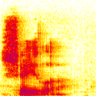

In [7]:
from PIL import Image
a=Image.open('../input/audio/sheila/' + sheila[9])
a

In [8]:
#Convert Yes Spectrogram Images to Pixels

data = np.empty((7300,96,96,3), dtype=np.float32)

# top 10

index = 0
image_name_list = yes
for image_name in image_name_list[:600]:
    imageA = Image.open('../input/audio/yes/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = no
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/no/' + image_name)
    data[index] = imageA
    index+=1
        
image_name_list = up
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/up/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = down
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/down/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = left
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/left/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = right
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/right/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = on
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/on/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = off
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/off/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = stop
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/stop/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = go
for image_name in image_name_list[:400]:
    imageA = Image.open('../input/audio/go/' + image_name)
    data[index] = imageA
    index+=1
    
# Top 10 done

# Silence 400 pictures  
image_name_list = silence
for image_name in image_name_list:
    imageA = Image.open('../input/audio/silence/' + image_name)
    data[index] = imageA
    index+=1    

# Unknown : 20 pictures from the rest
    
image_name_list = cat
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/cat/' + image_name)
    data[index] = imageA
    index+=1
     
image_name_list = four
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/four/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = house
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/house/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = nine
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/nine/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = seven
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/seven/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = two
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/two/' + image_name)
    data[index] = imageA
    index+=1

image_name_list = bed
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bed/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = eight
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/eight/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = one
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/one/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = sheila
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/sheila/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = three
for image_name in image_name_list[:20]:
    imageA = plt.imread('../input/audio/three/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = zero
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/zero/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = bird
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/bird/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = dog
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/dog/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = five
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/five/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = happy
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/happy/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = marvin
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/marvin/' + image_name)
    data[index] = imageA
    index+=1 
    
image_name_list = six
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/six/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = tree
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/tree/' + image_name)
    data[index] = imageA
    index+=1
    
image_name_list = wow
for image_name in image_name_list[:20]:
    imageA = Image.open('../input/audio/wow/' + image_name)
    data[index] = imageA
    index+=1

In [9]:
# 4800 data sets with 30 classes and 100 spectrograms in each class
data.shape

(4800, 96, 96, 3)

In [10]:
# check if the end is not empty meaning that 3000 has all been transferred
data[-1]

array([[[255., 255., 254.],
        [255., 255., 254.],
        [255., 255., 253.],
        ...,
        [255., 255., 228.],
        [255., 255., 242.],
        [255., 255., 253.]],

       [[255., 255., 250.],
        [255., 255., 253.],
        [255., 255., 240.],
        ...,
        [255., 255., 225.],
        [255., 255., 236.],
        [255., 255., 246.]],

       [[255., 255., 249.],
        [255., 255., 251.],
        [255., 255., 247.],
        ...,
        [255., 255., 204.],
        [255., 255., 228.],
        [255., 255., 226.]],

       ...,

       [[252., 106.,   1.],
        [254., 112.,   1.],
        [253., 128.,   6.],
        ...,
        [253., 134.,  13.],
        [252., 115.,   2.],
        [253., 112.,   2.]],

       [[229.,  18.,  30.],
        [230.,  29.,  30.],
        [226.,  18.,  34.],
        ...,
        [234.,  24.,  23.],
        [230.,  12.,  26.],
        [225.,  12.,  35.]],

       [[204.,   0.,  71.],
        [196.,   0.,  83.],
        [191.,  

In [11]:
data = data/255

(96, 96, 3)


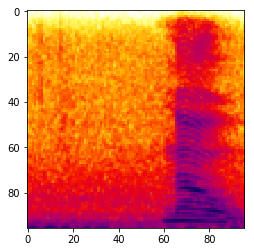

In [12]:
#show one image
plt.imshow(data[456])
print(data[456].shape)

In [13]:
# Flatten
# 50, 50 -> 2500
#single_image = data[0].flatten()

In [14]:
#single_image.shape

In [15]:
#new_image = single_image.reshape(129, 256, 3)

In [16]:
#random_df = pd.DataFrame(single_image)

In [17]:
#random_df = random_df.T

In [18]:
#random_df[-1] = [0]

In [19]:
#random_df

In [20]:
#data = data/255

In [21]:
print("min of pixel : " + str(data[0].min()))
print("max of pixel : " + str(data[0].max()))

min of pixel : 0.0
max of pixel : 1.0


In [22]:
"""
#concatenate all the flattened spectrograms in order
fl_data = np.empty((4800,2500), dtype=np.float32)

for i in range(len(data)):
    flat = data[i].flatten()
    fl_data[i] = flat
"""

'\n#concatenate all the flattened spectrograms in order\nfl_data = np.empty((4800,2500), dtype=np.float32)\n\nfor i in range(len(data)):\n    flat = data[i].flatten()\n    fl_data[i] = flat\n'

In [23]:
"""
# check if transferred all
print("size : " + str(fl_data.shape))
print(fl_data[-1])
"""

'\n# check if transferred all\nprint("size : " + str(fl_data.shape))\nprint(fl_data[-1])\n'

In [24]:
#for i in range(30):
#    print(i % 10)

In [25]:
#unique
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x)
    # print list 
    for x in unique_list: 
        print (x) 

In [26]:
# create labels
label = np.zeros((400,), dtype=int)

for i in range(1, 12):
    label = np.concatenate((label, np.repeat(i, 400)))

In [27]:
# check uniques
unique(label)

0
1
2
3
4
5
6
7
8
9
10
11


In [28]:
print(label.shape)
print(type(label[0]))

(4800,)
<class 'numpy.int64'>


In [29]:
#label = label.reshape((4800,1))

In [30]:
#type(np.float64(label[0][0]))

In [31]:
label.shape

(4800,)

In [32]:
#fl_data.shape

In [33]:
"""
#one hot encode the lable
b = np.zeros((label.size, label.max()+1))
b[np.arange(label.size), label] = 1
#labels = b
"""

'\n#one hot encode the lable\nb = np.zeros((label.size, label.max()+1))\nb[np.arange(label.size), label] = 1\n#labels = b\n'

### check on prepared datasets

In [34]:
"""
print(fl_data.shape)
print(labels.shape)
"""

'\nprint(fl_data.shape)\nprint(labels.shape)\n'

### Before dividing into train and test sets, let's combine so we can shuffle

In [35]:
#a=np.concatenate((fl_data, label), axis=1)
#a.shape

In [36]:
#shuffle
#np.random.shuffle(a)

In [37]:
#how to slice the labels again
#new_labels=a[:,-1:]#.sum()
#new_labels.shape

In [38]:
#how to slice the train again
#train_data=a[:,:2500]
#train_data.shape

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, label, test_size = 0.2)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((3840, 96, 96, 3), (960, 96, 96, 3), (3840,), (960,))

In [40]:
"""
x_train = train_data[:4000]
print("train : " + str(x_train.shape))
x_val = train_data[4000:]
print("train validation : " + str(x_val.shape))
y_train = new_labels[:4000]
y_train = np.int64(y_train)
print("train label : " + str(y_train.shape))
y_val = new_labels[4000:]
y_val = np.int64(y_val)
print("train validation label : " + str(y_val.shape))
"""

'\nx_train = train_data[:4000]\nprint("train : " + str(x_train.shape))\nx_val = train_data[4000:]\nprint("train validation : " + str(x_val.shape))\ny_train = new_labels[:4000]\ny_train = np.int64(y_train)\nprint("train label : " + str(y_train.shape))\ny_val = new_labels[4000:]\ny_val = np.int64(y_val)\nprint("train validation label : " + str(y_val.shape))\n'

In [41]:
"""
#change data types to df
x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)
"""

'\n#change data types to df\nx_train = pd.DataFrame(x_train)\nx_val = pd.DataFrame(x_val)\ny_train = pd.DataFrame(y_train)\ny_val = pd.DataFrame(y_val)\n'

In [42]:
print(type(x_train[0][0][0]))
y_train = np.int32(y_train)
print(type(y_train[0]))
print(type(x_val[0][0][0]))
y_val = np.int32(y_val)
print(type(y_val[0]))

<class 'numpy.ndarray'>
<class 'numpy.int32'>
<class 'numpy.ndarray'>
<class 'numpy.int32'>


In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(3840, 96, 96, 3)
(3840,)
(960, 96, 96, 3)
(960,)


## CNN Helper f(x)

In [44]:
def cnn_model_fn(features, labels, mode):
  # Input Layer
    input_layer = tf.reshape(features, [-1, 96, 96, 3])

  # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2) 

  # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 36864])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=12)

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    # here we define how we calculate our accuracy
    # if you want to monitor your training accuracy you need these two lines
    accuracy = tf.metrics.accuracy(labels=labels, predictions=predictions['classes'], name='acc_op')
    tf.summary.scalar('accuracy', accuracy[1])
  # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        tf.identity(accuracy[1], name='train_accuracy')
        tf.summary.scalar('train_accuracy', accuracy[1])
        eval_metric_ops = {'train_accuracy':accuracy}
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op, eval_metric_ops=eval_metric_ops)

  # Add evaluation metrics (for EVAL mode)
    tf.identity(accuracy[1], name='val_accuracy')
    tf.summary.scalar('val_accuracy', accuracy[1])
    eval_metric_ops = {'val_accuracy':accuracy}
    #eval_metric_ops = {
    #  "accuracy": tf.metrics.accuracy(
    #      labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [45]:
def construct_feature_columns():
    return set([tf.feature_column.numeric_column('pixels', shape=9216)])

In [46]:
def create_predict_input_fn(features, labels, batch_size):
    predict_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        num_epochs=1,
        shuffle=False)
    return predict_input_fn

def create_training_input_fn(features, labels, batch_size):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x=features,
        y=labels,
        batch_size=batch_size,
        num_epochs=None,
        shuffle=True)
    return train_input_fn

In [47]:
training_examples = x_train
validation_examples = x_val
training_targets = y_train
validation_targets = y_val

In [48]:
def train_hub_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):

    periods = 10
    steps_per_period = steps / periods 
    
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
  
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
    predict_training_input_fn = create_predict_input_fn(training_examples, training_targets, batch_size)
    
    predict_validation_input_fn = create_predict_input_fn(validation_examples, validation_targets, batch_size)
    training_input_fn = create_training_input_fn(training_examples, training_targets, batch_size)
  
    feature_columns = [tf.feature_column.numeric_column('pixels', shape=9216)]

    my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

    classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_4"
    )

    
    print("Training model...")
    print("LogLoss error (on validation data):")
    training_errors = []
    validation_errors = []
    for period in range (0, periods):
        classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period,
        )
        training_predictions = list(classifier.predict(input_fn=predict_training_input_fn))
        training_probabilities = np.array([item['probabilities'] for item in training_predictions])
        training_pred_class_id = np.array([item['classes'] for item in training_predictions])
        training_pred_one_hot = tf.keras.utils.to_categorical(training_pred_class_id,12) #change class number

        validation_predictions = list(classifier.predict(input_fn=predict_validation_input_fn))
        validation_probabilities = np.array([item['probabilities'] for item in validation_predictions])    
        validation_pred_class_id = np.array([item['classes'] for item in validation_predictions])
        validation_pred_one_hot = tf.keras.utils.to_categorical(validation_pred_class_id,12) #change class number

        # Compute training and validation errors.
        training_log_loss = metrics.log_loss(training_targets, training_pred_one_hot)
        validation_log_loss = metrics.log_loss(validation_targets, validation_pred_one_hot)
        # Occasionally print the current loss.
        print("  period %02d : %0.2f" % (period, validation_log_loss))
        # Add the loss metrics from this period to our list.
        training_errors.append(training_log_loss)
        validation_errors.append(validation_log_loss)
        
    print("Model training finished.")
    # Remove event files to save disk space.
    _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))

    # Calculate final predictions (not probabilities, as above).
    final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
    final_predictions = np.array([item['classes'] for item in final_predictions])


    accuracy = metrics.accuracy_score(validation_targets, final_predictions)
    print("Final accuracy (on validation data): %0.2f" % accuracy)

    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.plot(training_errors, label="training")
    plt.plot(validation_errors, label="validation")
    plt.legend()
    plt.show()

    # Output a plot of the confusion matrix.
    cm = metrics.confusion_matrix(validation_targets, final_predictions)
    # Normalize the confusion matrix by row (i.e by the number of samples
    # in each class).
    cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    ax = sns.heatmap(cm_normalized, cmap="bone_r")
    ax.set_aspect(1)
    plt.title("Confusion matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

    return classifier

In [49]:
#len(set(training_targets))
#validation_targets
print(validation_examples.shape)
print(len(validation_examples))

(960, 96, 96, 3)
960


In [50]:
print(len(set(validation_targets)))
print(len(set(training_targets)))

12
12


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mode_CNN_4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f78ad6f6a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Training model...
LogLoss error (on validation data):
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instruct

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
  period 05 : 28.93
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_4/model.ckpt-6
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 6 into ./mode_CNN_4/model.ckpt.
INFO:tensorflow:loss = 2.553953, step = 7
INFO:tensorflow:Saving checkpoints for 7 into ./mode_CNN_4/model.ckpt.
INFO:tensorflow:Loss for final step: 2.553953.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_4/model.ckpt-7
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was f

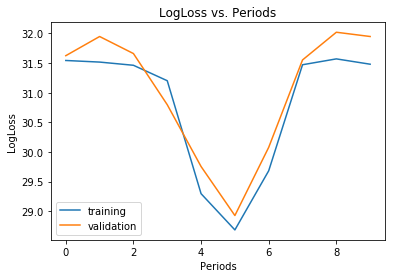

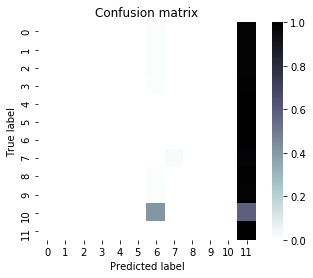

In [51]:
classifier = train_hub_classification_model(
    learning_rate=0.01,
    steps=10,
    batch_size=10,
    hidden_units=[100, 100],
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

# PREDS

In [59]:
classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn,
    model_dir="./mode_CNN_4",
    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mode_CNN_4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f78d0e4c160>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
def my_test_input_fn(features, batch_size=1, num_epochs=None):
    raw_features = features
    ds = Dataset.from_tensor_slices((raw_features))
    ds = ds.batch(batch_size).repeat(num_epochs)
    features = ds.make_one_shot_iterator().get_next()
    return features

predict_test_input_fn = lambda: my_test_input_fn(
    test_images,
    num_epochs=1,)

In [69]:
test_pict_path = '../input/audio_test'

In [70]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[:50000]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'x' + '.csv', index=False)

<class 'list'>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_4/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


InvalidArgumentError: Input to reshape is a tensor with 1 values, but the requested shape requires a multiple of 27648
	 [[{{node Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](IteratorGetNext, Reshape/shape)]]

Caused by op 'Reshape', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 427, in run_forever
    self._run_once()
  File "/usr/lib/python3.6/asyncio/base_events.py", line 1440, in _run_once
    handle._run()
  File "/usr/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.6/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.6/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-75fee690ef29>", line 14, in <module>
    test_predictions = np.array([item['classes'] for item in test_predictions])
  File "<ipython-input-70-75fee690ef29>", line 14, in <listcomp>
    test_predictions = np.array([item['classes'] for item in test_predictions])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 551, in predict
    features, None, model_fn_lib.ModeKeys.PREDICT, self.config)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/estimator/estimator.py", line 1169, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "<ipython-input-44-213db1b8e97c>", line 3, in cnn_model_fn
    input_layer = tf.reshape(features, [-1, 96, 96, 3])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 6296, in reshape
    "Reshape", tensor=tensor, shape=shape, name=name)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): Input to reshape is a tensor with 1 values, but the requested shape requires a multiple of 27648
	 [[{{node Reshape}} = Reshape[T=DT_FLOAT, Tshape=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](IteratorGetNext, Reshape/shape)]]


In [63]:
# kernel keeps dying when running all test files, so I split it into thirds and concat the datasets afterward.
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[50000:100000]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'y' + '.csv', index=False)

<class 'list'>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_4/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
test_images = []
fnames = []
all_files = [y for y in os.listdir(test_pict_path) if '.png' in y]
print(type(all_files))
i = 0
test_images = []
fnames = []
for file in all_files[100000:]:
    test_images.append(cv2.imread(test_pict_path + file))
    fnames.append(file[:-4] + '.wav')
test_images = np.array(test_images, dtype="float32")
test_images /= 255
test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])

my_submission = pd.DataFrame({'fname': fnames, 'label': test_predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('speech_' + 'z' + '.csv', index=False)

<class 'list'>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mode_CNN_4/model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [66]:
label_dict = {'yes':0, 'no':1, 'up':2, 'down':3, 'left':4, 'right':5, 'on':6, 'off':7, 
              'stop':8, 'go':9, 'silence':10, 'unknown':11}

reverse_dict = {v: k for k, v in label_dict.items()}

In [67]:
d0 = pd.read_csv("./speech_" + 'x' + ".csv",sep=",")
d1 = pd.read_csv("./speech_" + 'y' + ".csv",sep=",")
d2 = pd.read_csv("./speech_" + 'z' + ".csv",sep=",")

df = [d0,d1,d2]
dx = pd.concat(df)

dx = dx.replace({"label": reverse_dict})

dx.to_csv('submission.csv', index=False)
dx

,fname,label
